# 1. IMPORT SECTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score

1.1. DOWNLOADING DATASET FROM UCI MACHINE LEARNING REPOSITORY

In [2]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', header=None)

# 2. EDA

2.1. ANALYZING THE BEGINNING AND ENDING OF DATAFRAME

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [4]:
df.tail(17)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


Observations:
    - Attribute names and values have been changed to meaningless symbols to protect data confidentiality 
    - Missing values are denoted as '?'

CHANGING COLUMN NAMES TO MORE MEANINGFUL

In [5]:
columns = ['Male','Age','Debt','Married','BankCustomer','EducationLevel','Ethnicity','YearsEmployed','PiorDefault',
          'Employed','CreditScore','DriversLicence', 'Citizen','ZipCode', 'Income','Approved']
df.columns = columns

CHECKING COLUMNS DATA TYPES

In [6]:
df.dtypes

Male               object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PiorDefault        object
Employed           object
CreditScore         int64
DriversLicence     object
Citizen            object
ZipCode            object
Income              int64
Approved           object
dtype: object

Observations:
    - Age column should have float data type,
    - DriversLicence and ZipCode column are not neccesary for analysis

In [7]:
# DROPPING IRRELEVANT COLUMNS
df.drop(['DriversLicence','ZipCode'], axis=1, inplace=True)

In [8]:
# CHANGING MISSING VALUES FROM '?' TO NaN
df.replace('?', np.NaN, inplace=True)

In [9]:
# CHANGING AGE COLUMN TO NUMERIC DATA TYPE
df['Age'] = df['Age'].apply(pd.to_numeric)

In [10]:
# COUNTING NULL VALUES
df.isna().sum()

Male              12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PiorDefault        0
Employed           0
CreditScore        0
Citizen            0
Income             0
Approved           0
dtype: int64

In [11]:
# FILLING NULL VALUES FROM NUMERICAL COLUMNS WITH MEAN IMPUTATION
df.fillna(df.mean(), inplace=True)

In [12]:
# FILLING NULL VALUES FROM CATEGORICAL COLUMNS WITH MOST COMMON VALUE
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col].fillna(df[col].value_counts().idxmax(), inplace=True)

In [13]:
# CHECKING SUM OF MISSING VALUES
df.isna().sum()

Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PiorDefault       0
Employed          0
CreditScore       0
Citizen           0
Income            0
Approved          0
dtype: int64

In [14]:
# CHECKING DATASET BALANCE
df.groupby('Approved').size()

Approved
+    307
-    383
dtype: int64

In [15]:
# CHECKING DATASET BALANCE IN %
round(df.groupby('Approved').size()*100/len(df), 2)

Approved
+    44.49
-    55.51
dtype: float64

In [16]:
# CHECKING DUPLICATES VALUES
df[df.duplicated() == True]

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PiorDefault,Employed,CreditScore,Citizen,Income,Approved


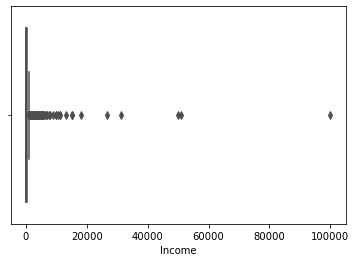

In [17]:
# CHECKING FOR OUTLIERS
sns.boxplot(x=df['Income'], palette = 'YlGnBu')

In [18]:
df[df['Income'] >= 100000]

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PiorDefault,Employed,CreditScore,Citizen,Income,Approved
317,b,17.5,22.0,l,gg,ff,o,0.0,f,f,0,p,100000,+


In [19]:
# DROPPING POTENTIAL OUTLINER
df = df[df['Income'] != 100000]

In [20]:
# NUMBERS TO BE CHECKED
df[df['CreditScore'] > 30]

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PiorDefault,Employed,CreditScore,Citizen,Income,Approved
44,b,56.42,28.0,y,p,c,v,28.50,t,t,40,g,15,+
121,b,25.67,12.5,u,g,cc,v,1.21,t,t,67,g,258,+


Text(0, 0.5, 'Number of applicants by gender')

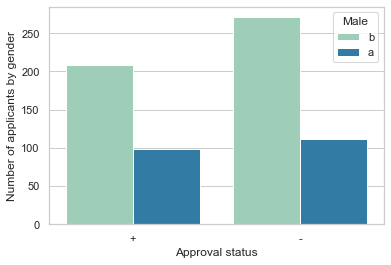

In [21]:
sns.set(style="whitegrid")
sns.countplot(x="Approved", hue='Male', data=df, palette='YlGnBu')
plt.xlabel('Approval status')
plt.ylabel('Number of applicants by gender')

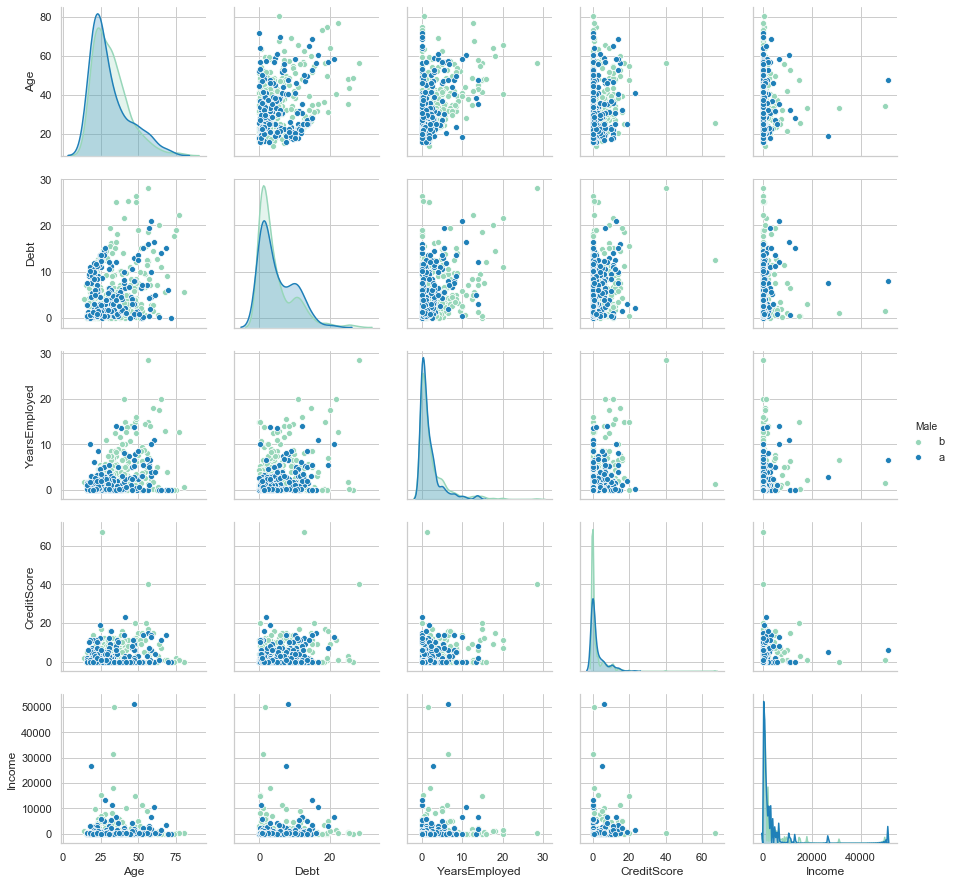

In [156]:
sns.pairplot(df, hue='Male', palette = 'YlGnBu');# with KDE plots

# 3. PREPROCESSING

In [24]:
# CONVERTING ALL NON-NUMERIC VALUES INTO NUMERIC
le = LabelEncoder()
for col in df.columns:
    if df[col].dtypes=='object':
        df[col]=le.fit_transform(df[col])

In [25]:
df.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PiorDefault,Employed,CreditScore,Citizen,Income,Approved
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,0,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,2,0,0


In [26]:
df = df.values

In [28]:
# SPLITTING DATA INTO FEATURES AND LABEL
X,y = df[:,0:13], df[:,13]

In [29]:
# SPLITTING DATA INTO TRAINING AND TESTING DATA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [30]:
# SCALING DATA
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

In [31]:
# BUILDING MODELS: FITTING DATA
clf_tree = tree.DecisionTreeClassifier().fit(rescaledX_train, y_train)
clf_forest = RandomForestClassifier(max_depth=2, random_state=0).fit(rescaledX_train, y_train)
clf_reg = LogisticRegression(random_state=0).fit(rescaledX_train, y_train)

In [32]:
# BUILDING MODELS: PREDICTING LABELS
y_pred_tree = clf_tree.predict(rescaledX_test)
y_pred_forest = clf_forest.predict(rescaledX_test)
y_pred_reg = clf_reg.predict(rescaledX_test)

In [33]:
print('Accuracy score for decision tree: {}'.format(round(accuracy_score(y_test, y_pred_tree),2)))
print('Accuracy score for forest tree: {}'.format(round(accuracy_score(y_test, y_pred_forest),2)))
print('Accuracy score for logistic regression tree: {}'.format(round(accuracy_score(y_test, y_pred_reg),2)))

Accuracy score for decision tree: 0.82
Accuracy score for forest tree: 0.84
Accuracy score for logistic regression tree: 0.85


In [34]:
matrix_tree = confusion_matrix(y_test, y_pred_tree)
matrix_forest = confusion_matrix(y_test, y_pred_forest)
matrix_reg = confusion_matrix(y_test, y_pred_reg)

In [35]:
matrixes = {'Decision Tree': matrix_tree, 'Random Forest': matrix_forest, 
            'Logistic Regression': matrix_reg}
[print('Confusion matrix for {}: \n {} \n'.format(k,v)) for k,v in matrixes.items()]

Confusion matrix for Decision Tree: 
 [[ 79  22]
 [ 20 107]] 

Confusion matrix for Random Forest: 
 [[ 78  23]
 [ 13 114]] 

Confusion matrix for Logistic Regression: 
 [[ 91  10]
 [ 25 102]] 



[None, None, None]

In [36]:
print("Precision score for decision tree: {}".format(round(precision_score(y_test,y_pred_tree),2)))
print("Precision score for random forest: {}".format(round(precision_score(y_test,y_pred_forest),2)))
print("Precision score for logisitc regression: {}".format(round(precision_score(y_test,y_pred_reg),2)))

Precision score for decision tree: 0.83
Precision score for random forest: 0.83
Precision score for logisitc regression: 0.91


In [37]:
print("Recall score for decision tree: {}".format(round(recall_score(y_test,y_pred_tree),2)))
print("Recall score for random forest: {}".format(round(recall_score(y_test,y_pred_forest),2)))
print("Recall score for logisitc regression: {}".format(round(recall_score(y_test,y_pred_reg),2)))

Recall score for decision tree: 0.84
Recall score for random forest: 0.9
Recall score for logisitc regression: 0.8


In [38]:
print("F1 score for decision tree: {}".format(round(f1_score(y_test,y_pred_tree),2)))
print("F1 score for random forest: {}".format(round(f1_score(y_test,y_pred_forest),2)))
print("F1 score for logisitc regression: {}".format(round(f1_score(y_test,y_pred_reg),2)))

F1 score for decision tree: 0.84
F1 score for random forest: 0.86
F1 score for logisitc regression: 0.85


FINDING OPTIMAL PARAMETERS TO IMPROVE MODEL PERFORMANCE

In [39]:
# LOGISTIC REGRESSSION
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
max_iter = [100, 200, 300]

param_grid_reg = {'C': C, 'max_iter': max_iter}
grid_model_reg = GridSearchCV(clf_reg, param_grid_reg)

In [40]:
grid_model_reg.fit(rescaledX_train, y_train)

GridSearchCV(estimator=LogisticRegression(random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 200, 300]})

In [41]:
print('The best parameters for logistic regression: {}'.format(grid_model_reg.best_params_))

The best parameters for logistic regression: {'C': 0.1, 'max_iter': 100}


In [42]:
y_pred_reg_upgrade = grid_model_reg.predict(rescaledX_test)

In [43]:
print('Accuracy score for upgraded logistic regression:\n{}\n'.format(round(accuracy_score(y_test, y_pred_reg),2)))
print('Confusion matrix for updated logistic regression:\n{}\n'.format(confusion_matrix(y_test, y_pred_reg_upgrade)))
print('Precision score for updated logistic regression: \n{}\n'.format(round(precision_score(y_test, y_pred_reg_upgrade),2)))
print('Recall score for updated logistic regression: \n{}\n'.format(round(recall_score(y_test, y_pred_reg_upgrade),2)))
print('F1 score for updated logistic regression: \n{} \n'.format(round(f1_score(y_test, y_pred_reg_upgrade),2)))

Accuracy score for upgraded logistic regression:
0.85

Confusion matrix for updated logistic regression:
[[ 92   9]
 [ 23 104]]

Precision score for updated logistic regression: 
0.92

Recall score for updated logistic regression: 
0.82

F1 score for updated logistic regression: 
0.87 



In [44]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred_reg_upgrade)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.85


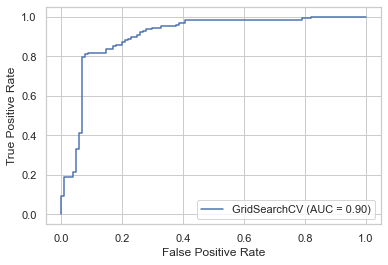

In [47]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(grid_model_reg, rescaledX_test, y_test)